In [3]:
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from voc import VOC

import numpy as np

In [4]:
common_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomRotation(2),
    transforms.RandomCrop([224, 224]),
])
#transform_both = transforms.Lambda(lambda image, label: (common_transform(image), common_transform(label)))

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
mask_transform = transforms.Compose([
    transforms.ToTensor(),
])

"""input_transform = standard_transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomRotation(2),
    transforms.RandomCrop([224, 224]),
    transforms.ToTensor()
    ])

target_transform = standard_transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomRotation(2),
    transforms.RandomCrop([224, 224]),
    MaskToTensor(),
    ])"""

'input_transform = standard_transforms.Compose([\n    transforms.RandomHorizontalFlip(),\n    transforms.RandomVerticalFlip(),\n    transforms.RandomRotation(15),\n    transforms.RandomRotation(2),\n    transforms.RandomCrop([224, 224]),\n    transforms.ToTensor()\n    ])\n\ntarget_transform = standard_transforms.Compose([\n    transforms.RandomHorizontalFlip(),\n    transforms.RandomVerticalFlip(),\n    transforms.RandomRotation(15),\n    transforms.RandomRotation(2),\n    transforms.RandomCrop([224, 224]),\n    MaskToTensor(),\n    ])'

In [5]:
batch_size = 1

In [13]:
ds = VOC("val", img_transform, mask_transform, common_transform, vcopies = 10)
tmp = DataLoader(ds, batch_size=batch_size, shuffle=True)

In [14]:
len(ds)

2130

In [ ]:
tmpi = iter(tmp)

In [ ]:
tmpi

In [ ]:
im, msk = tmpi.next()

plt.imshow(np.rot90(np.rot90(np.rot90((im.view(3,224,224)).numpy().T))))
plt.show()

In [ ]:
plt.imshow(np.rot90(np.rot90(np.rot90((msk.view(1,224,224)).numpy().T))))

plt.show()

In [ ]:
items = []
import os
num_classes = 21
ignore_label = 255
root = './data'
img_path = os.path.join(root, 'VOCdevkit', 'VOC2007', 'JPEGImages')
mask_path = os.path.join(root, 'VOCdevkit', 'VOC2007', 'SegmentationClass')
data_list = [l.strip('\n') for l in open(os.path.join(
    root, 'VOCdevkit', 'VOC2007', 'ImageSets', 'Segmentation', 'train.txt')).readlines()]
for it in data_list:
    item = (os.path.join(img_path, it + '.jpg'), os.path.join(mask_path, it + '.png'))
    items.append(item)
    
from PIL import Image
dick = {}
for i in range(len(items)):
    img_path, mask_path = items[i]
    img = Image.open(img_path).convert('RGB').resize((224,224))
    mask = np.array(Image.open(mask_path).resize((224,224)))
    
   
    for r in range(len(mask)):
        for c in range(len(mask[r])):
            dick[int(mask[r][c])] = dick.get(int(mask[r][c]), 0) + 1


            
print(dick)
    


In [ ]:
dick[0]+=dick[255]
del dick[255]

In [ ]:
np.sum(list(dick.values()))

In [ ]:
10486784/224

In [ ]:
46816.0/224

In [ ]:
224*224*209

In [ ]:
len(dick)

In [ ]:
print(dick)

In [ ]:
print(dick)

In [5]:
!python train.py

Metric before Training
Starting val on device for epoch 0 on device cuda
Loss at epoch: 0 is 3.831881148474557
IoU at epoch: 0 is 0.0007834507345178628
Pixel acc at epoch: 0 is 0.004683691975674198
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': False, 'Optimizer': 'AdamW', 'momentum if SGD': 0.99, 'scheduler': False, 'early stop': True, 'patience': 3, 'device': device(type='cuda'), 'bestModelPath': 'best_model.pth'}
epoch0, iter0, loss: 3.6961402893066406
epoch0, iter10, loss: 2.8799495697021484
Finish epoch 0, time elapsed 3.092111349105835

Starting val on device for epoch 1 on device cuda
Loss at epoch: 1 is 10.486902781895228
IoU at epoch: 1 is 0.024333705216145994
Pixel acc

In [1]:
import torch
import gc
gc.collect()
torch.cuda.empty_cache()

In [2]:
!python train.py

Metric before Training
Starting val on device for epoch 0 on device cuda
Loss at epoch: 0 is 3.5724990367889404
IoU at epoch: 0 is 0.0016018584448382917
Pixel acc at epoch: 0 is 0.011230486544506197
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': False, 'Optimizer': 'AdamW', 'momentum if SGD': 0.99, 'scheduler': False, 'early stop': True, 'patience': 3, 'device': device(type='cuda'), 'bestModelPath': 'best_model.pth'}
epoch0, iter0, loss: 3.3565895557403564
epoch0, iter10, loss: 2.292715549468994
Finish epoch 0, time elapsed 3.0619595050811768

Starting val on device for epoch 1 on device cuda
Loss at epoch: 1 is 3.1764515978949412
IoU at epoch: 1 is 0.025510612719936463
Pixel ac

Loss at epoch: 15 is 1.288468795163291
IoU at epoch: 15 is 0.05270601584074154
Pixel acc at epoch: 15 is 0.7497369260204082
This loss higher than before, increasing patience to 1
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch15, iter0, loss: 1.1719962358474731
epoch15, iter10, loss: 1.1757596731185913
Finish epoch 15, time elapsed 2.8419084548950195

Starting val on device for epoch 16 on device cuda
Loss at epoch: 16 is 1.2683939124856676
IoU at epoch: 16 is 0.04937104122600416
Pixel acc at epoch: 16 is 0.7467677347166545
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch16, iter0, loss: 1.0338268280029297
epoch16, iter10, loss: 1.285830020904541
Finish epoch 16, time elapse

In [9]:
!python train_4_a.py

Metric before Training
Starting val on device for epoch 0 on device cuda
Loss at epoch: 0 is 4.424386978149414
IoU at epoch: 0 is 0.0007591133715035299
Pixel acc at epoch: 0 is 0.004140692619123543
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': False, 'Optimizer': 'AdamW', 'momentum if SGD': 0.99, 'scheduler': True, 'early stop': True, 'patience': 3, 'device': device(type='cuda'), 'bestModelPath': 'best_model_4_a.pth'}
epoch0, iter0, loss: 4.4763898849487305
epoch0, iter10, loss: 3.3940696716308594
Finish epoch 0, time elapsed 3.223120927810669

Starting val on device for epoch 1 on device cuda
Loss at epoch: 1 is 103.69294466291156
IoU at epoch: 1 is 0.012702182940225312
Pixel 

epoch15, iter0, loss: 1.212247371673584
epoch15, iter10, loss: 1.2644888162612915
Finish epoch 15, time elapsed 2.858318567276001

Starting val on device for epoch 16 on device cuda
Loss at epoch: 16 is 1.2140876182488032
IoU at epoch: 16 is 0.05947649111772839
Pixel acc at epoch: 16 is 0.7491305248382837
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch16, iter0, loss: 1.1059637069702148
epoch16, iter10, loss: 1.4103080034255981
Finish epoch 16, time elapsed 2.8706488609313965

Starting val on device for epoch 17 on device cuda
Loss at epoch: 17 is 1.2597576464925493
IoU at epoch: 17 is 0.054863499332821246
Pixel acc at epoch: 17 is 0.7428584952396137
This loss higher than before, increasing patience to 1
_______________________________________________________________________________________________________________________________

In [4]:
!python train_4_b.py

Metric before Training
Starting val on device for epoch 0 on device cuda
Loss at epoch: 0 is 6.107266868863787
IoU at epoch: 0 is 0.0007739601041153911
Pixel acc at epoch: 0 is 0.007062906426521502
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': False, 'Optimizer': 'AdamW', 'momentum if SGD': 0.99, 'scheduler': True, 'early stop': True, 'patience': 3, 'device': device(type='cuda'), 'bestModelPath': 'best_model_4_b.pth'}
epoch0, iter0, loss: 5.047439098358154
epoch0, iter10, loss: 3.937222480773926
epoch0, iter20, loss: 3.32529878616333
epoch0, iter30, loss: 2.661120891571045
Finish epoch 0, time elapsed 9.153206825256348

Starting val on device for epoch 1 on device cuda
Loss at 

Loss at epoch: 13 is 1.1938773734228951
IoU at epoch: 13 is 0.06183768679563574
Pixel acc at epoch: 13 is 0.7484903852724125
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch13, iter0, loss: 0.9260284900665283
epoch13, iter10, loss: 0.9411778450012207
epoch13, iter20, loss: 1.1792649030685425
epoch13, iter30, loss: 0.9817658066749573
Finish epoch 13, time elapsed 9.218292236328125

Starting val on device for epoch 14 on device cuda
Loss at epoch: 14 is 1.2408357475485121
IoU at epoch: 14 is 0.06306768476860505
Pixel acc at epoch: 14 is 0.746408855115707
This loss higher than before, increasing patience to 1
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch14, iter0, loss: 1.453

________________________________________________________________________________________________________________________________________________________________________________________________________
epoch26, iter0, loss: 0.6774110794067383
epoch26, iter10, loss: 0.91114342212677
epoch26, iter20, loss: 1.0882394313812256
epoch26, iter30, loss: 0.9126322865486145
Finish epoch 26, time elapsed 9.014528274536133

Starting val on device for epoch 27 on device cuda
Loss at epoch: 27 is 1.352735459804535
IoU at epoch: 27 is 0.05893241671350703
Pixel acc at epoch: 27 is 0.6775556647742803
This loss higher than before, increasing patience to 2
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch27, iter0, loss: 1.1671456098556519
epoch27, iter10, loss: 0.9727686643600464
epoch27, iter20, loss: 1.039434552192688
epoch27, iter30, loss: 0.96715

In [5]:
!python train_4_c.py

Metric before Training
Starting val on device for epoch 0 on device cuda
Loss at epoch: 0 is 4.214519245283944
IoU at epoch: 0 is 0.00044951324533919115
Pixel acc at epoch: 0 is 0.006605320699708455
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': True, 'Optimizer': 'AdamW', 'momentum if SGD': 0.99, 'scheduler': True, 'early stop': True, 'patience': 3, 'device': device(type='cuda'), 'bestModelPath': 'best_model_4_c.pth'}
epoch0, iter0, loss: 3.216153383255005
epoch0, iter10, loss: 2.9090492725372314
epoch0, iter20, loss: 2.695568323135376
epoch0, iter30, loss: 2.284916400909424
Finish epoch 0, time elapsed 9.45967173576355

Starting val on device for epoch 1 on device cuda
Loss at

Loss at epoch: 13 is 2.127106922013419
IoU at epoch: 13 is 0.06690288798506765
Pixel acc at epoch: 13 is 0.726146642390215
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch13, iter0, loss: 1.7792552709579468
epoch13, iter10, loss: 2.045881748199463
epoch13, iter20, loss: 1.7554439306259155
epoch13, iter30, loss: 2.1210646629333496
Finish epoch 13, time elapsed 8.594231367111206

Starting val on device for epoch 14 on device cuda
Loss at epoch: 14 is 2.1305987324033464
IoU at epoch: 14 is 0.06518144083138176
Pixel acc at epoch: 14 is 0.696017411568422
This loss higher than before, increasing patience to 1
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch14, iter0, loss: 1.541602

epoch26, iter0, loss: 1.5181362628936768
epoch26, iter10, loss: 1.3009135723114014
epoch26, iter20, loss: 1.6698691844940186
epoch26, iter30, loss: 1.786496639251709
Finish epoch 26, time elapsed 9.627452611923218

Starting val on device for epoch 27 on device cuda
Loss at epoch: 27 is 2.314610072544643
IoU at epoch: 27 is 0.05238427239173219
Pixel acc at epoch: 27 is 0.6380016093351404
This loss higher than before, increasing patience to 2
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch27, iter0, loss: 1.6646952629089355
epoch27, iter10, loss: 1.3453019857406616
epoch27, iter20, loss: 1.7341914176940918
epoch27, iter30, loss: 1.3998935222625732
Finish epoch 27, time elapsed 9.311488151550293

Starting val on device for epoch 28 on device cuda
Loss at epoch: 28 is 2.140079370566777
IoU at epoch: 28 is 0.06390007351985039
Pixel ac

In [6]:
!python train_5_a.py

Metric before Training
Starting val on device for epoch 0 on device cuda
/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:693: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch._C._nn.max_pool2d_with_indices(input, kernel_size, stride, padding, dilation, ceil_mode)
Loss at epoch: 0 is 3.2590869267781577
IoU at epoch: 0 is 0.002396565492566289
Pixel acc at epoch: 0 is 0.01130845350292895
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.007, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': True, 'Optimizer':

epoch9, iter20, loss: 2.3984546661376953
epoch9, iter30, loss: 1.7154544591903687
epoch9, iter40, loss: 1.4224830865859985
epoch9, iter50, loss: 2.2736897468566895
epoch9, iter60, loss: 1.9385654926300049
epoch9, iter70, loss: 2.3344802856445312
Finish epoch 9, time elapsed 10.900072574615479

Starting val on device for epoch 10 on device cuda
Loss at epoch: 10 is 2.153671251402961
IoU at epoch: 10 is 0.06818001960301066
Pixel acc at epoch: 10 is 0.6915921880905138
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch10, iter0, loss: 1.67965829372406
epoch10, iter10, loss: 1.7548526525497437
epoch10, iter20, loss: 2.3087968826293945
epoch10, iter30, loss: 1.6947373151779175
epoch10, iter40, loss: 1.4254167079925537
epoch10, iter50, loss: 2.2788591384887695
epoch10, iter60, loss: 2.1449596881866455
epoch10, iter70, loss: 2.3383450508117

Loss at epoch: 20 is 2.3171642179842347
IoU at epoch: 20 is 0.060501009523534884
Pixel acc at epoch: 20 is 0.6974614911068594
This loss higher than before, increasing patience to 2
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch20, iter0, loss: 1.572373628616333
epoch20, iter10, loss: 1.8257230520248413
epoch20, iter20, loss: 2.3002700805664062
epoch20, iter30, loss: 1.8331490755081177
epoch20, iter40, loss: 1.4004572629928589
epoch20, iter50, loss: 2.373220443725586
epoch20, iter60, loss: 2.0065019130706787
epoch20, iter70, loss: 2.240694761276245
Finish epoch 20, time elapsed 10.560454845428467

Starting val on device for epoch 21 on device cuda
Loss at epoch: 21 is 3.4649226797951593
IoU at epoch: 21 is 0.059957964454171946
Pixel acc at epoch: 21 is 0.6960277416087963
This loss higher than before, increasing patience to 3
Khal

In [7]:
!python train_5_b.py

Metric before Training
Starting val on device for epoch 0 on device cuda
/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Loss at epoch: 0 is 3.2934542383466447
IoU at epoch: 0 is 0.0016052810774745358
Pixel acc at epoch: 0 is 0.005935624459047012
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': True, 'Optimizer': 'AdamW', 'momentum

epoch12, iter0, loss: 1.038180947303772
epoch12, iter10, loss: 1.1277899742126465
epoch12, iter20, loss: 1.0455679893493652
epoch12, iter30, loss: 0.9357580542564392
Finish epoch 12, time elapsed 8.46904706954956

Starting val on device for epoch 13 on device cuda
Loss at epoch: 13 is 1.4476229378155299
IoU at epoch: 13 is 0.12987112463567652
Pixel acc at epoch: 13 is 0.7744262161477312
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch13, iter0, loss: 0.943852961063385
epoch13, iter10, loss: 0.8367404937744141
epoch13, iter20, loss: 1.0576350688934326
epoch13, iter30, loss: 0.8848071694374084
Finish epoch 13, time elapsed 8.774055242538452

Starting val on device for epoch 14 on device cuda
Loss at epoch: 14 is 1.49545875617436
IoU at epoch: 14 is 0.11837853352514083
Pixel acc at epoch: 14 is 0.7528961092668094
This loss higher tha

epoch25, iter20, loss: 0.5452286601066589
epoch25, iter30, loss: 0.6753695011138916
Finish epoch 25, time elapsed 8.59482717514038

Starting val on device for epoch 26 on device cuda
Loss at epoch: 26 is 1.6191817011151994
IoU at epoch: 26 is 0.1314251060292098
Pixel acc at epoch: 26 is 0.7671995112916818
This loss higher than before, increasing patience to 1
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch26, iter0, loss: 0.4404791295528412
epoch26, iter10, loss: 0.49698564410209656
epoch26, iter20, loss: 0.43974199891090393
epoch26, iter30, loss: 0.4986153542995453
Finish epoch 26, time elapsed 8.437934637069702

Starting val on device for epoch 27 on device cuda
Loss at epoch: 27 is 1.6237824644361223
IoU at epoch: 27 is 0.13241527526667868
Pixel acc at epoch: 27 is 0.7334440982028971
This loss higher than before, increasing pa

In [3]:
!python train_5_c.py

Metric before Training
Starting val on device for epoch 0 on device cuda
/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Loss at epoch: 0 is 4.556783702638414
IoU at epoch: 0 is 0.0008344090967769509
Pixel acc at epoch: 0 is 0.008532742524092972
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': True, 'Optimizer': 'AdamW', 'momentum 

epoch9, iter40, loss: 1.6991926431655884
epoch9, iter50, loss: 2.1671879291534424
epoch9, iter60, loss: 1.7484210729599
epoch9, iter70, loss: 1.5025098323822021
Finish epoch 9, time elapsed 16.70984387397766

Starting val on device for epoch 10 on device cuda
Loss at epoch: 10 is 2.221637147444266
IoU at epoch: 10 is 0.0689152092738431
Pixel acc at epoch: 10 is 0.5476072742465042
This loss higher than before, increasing patience to 1
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch10, iter0, loss: 1.8235447406768799
epoch10, iter10, loss: 1.7865124940872192
epoch10, iter20, loss: 2.14084529876709
epoch10, iter30, loss: 1.2645691633224487
epoch10, iter40, loss: 2.0904858112335205
epoch10, iter50, loss: 1.758797287940979
epoch10, iter60, loss: 1.820225477218628
epoch10, iter70, loss: 2.2221083641052246
Finish epoch 10, time elapsed 

epoch20, iter0, loss: 1.691455602645874
epoch20, iter10, loss: 1.6323251724243164
epoch20, iter20, loss: 1.9763909578323364
epoch20, iter30, loss: 1.240977168083191
epoch20, iter40, loss: 1.9733006954193115
epoch20, iter50, loss: 1.5785750150680542
epoch20, iter60, loss: 1.619727611541748
epoch20, iter70, loss: 2.13120698928833
Finish epoch 20, time elapsed 16.85566782951355

Starting val on device for epoch 21 on device cuda
Loss at epoch: 21 is 2.016573331974171
IoU at epoch: 21 is 0.07225970792225896
Pixel acc at epoch: 21 is 0.6729713630243763
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch21, iter0, loss: 1.7352534532546997
epoch21, iter10, loss: 1.8921992778778076
epoch21, iter20, loss: 1.4606572389602661
epoch21, iter30, loss: 1.9702460765838623
epoch21, iter40, loss: 1.970860481262207
epoch21, iter50, loss: 1.625094890594

## Plotting Segmented

In [1]:
'''
color map
0=background, 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle # 6=bus, 7=car, 8=cat, 9=chair, 10=cow, 11=diningtable,
12=dog, 13=horse, 14=motorbike, 15=person # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
'''


palette = [0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128, 128,
           128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0, 128, 192, 0, 128,
           64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0, 192, 0, 128, 192, 0, 0, 64, 128]  #3 values- R,G,B for every class. First 3 values for class 0, next 3 for


dick = {}
c = 0
for i in range(0,len(palette),3):
    dick[c] = palette[i:i+3]
    c+=1

palette = dick

In [67]:
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from voc import VOC

import numpy as np

common_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomRotation(2),
    transforms.RandomCrop([224, 224]),
])
#transform_both = transforms.Lambda(lambda image, label: (common_transform(image), common_transform(label)))

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
mask_transform = transforms.Compose([
    transforms.ToTensor(),
])

batch_size = 1
ds = VOC("test", img_transform, mask_transform, common_transform)
tmp = DataLoader(ds, batch_size=batch_size, shuffle=True)
tmpi = iter(tmp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


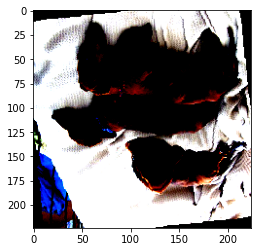

In [68]:
im, msk = tmpi.next()

plt.imshow(np.rot90(np.rot90(np.rot90((im.view(3,224,224)).numpy().T))))

In [57]:
msk = (msk*255).int()
msk[msk==255]=0
np.unique(msk)

array([ 0, 17], dtype=int32)

In [58]:
import train
import train_4_a
import train_4_b
import train_4_c
import train_5_a
import train_5_b
import train_5_c

In [59]:
out = train_5_c.exportModel(im)

In [60]:
maskk = out.to("cpu").detach()

In [61]:
pred = torch.argmax(maskk, dim=1)

In [62]:
import torch
import numpy as np
from PIL import Image

# Define the RGB image tensor and the mask
img = im
mask = pred

# Convert the mask to an RGB image
mask_rgb = np.zeros((3, 224, 224), dtype=np.uint8)
for idx, color in palette.items():
    for j in range(3):
        mask_rgb[j][mask[0] == idx] = color[j]
        mask_rgb[j][mask[0] == idx] = color[j]
        mask_rgb[j][mask[0] == idx] = color[j]


In [63]:
print(torch.unique(pred), torch.unique(msk))

tensor([0]) tensor([ 0, 17], dtype=torch.int32)


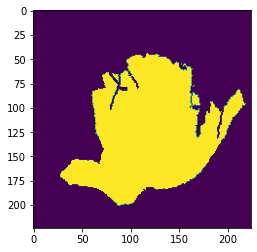

In [64]:
plt.imshow(np.rot90(np.rot90(np.rot90((msk.reshape(1,224,224)).T))))

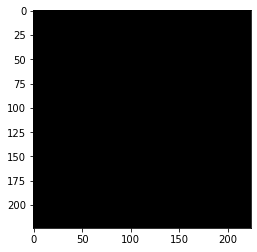

In [65]:
plt.imshow(np.rot90(np.rot90(np.rot90((mask_rgb.reshape(3,224,224)).T))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


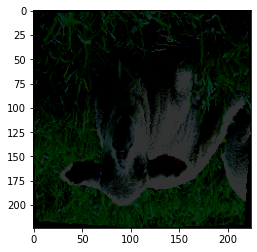

In [66]:
plt.imshow(np.rot90(np.rot90(np.rot90((im.reshape(3,224,224)).T))))
plt.imshow(np.rot90(np.rot90(np.rot90((mask_rgb.reshape(3,224,224)).T))), alpha=0.8)
plt.show()

In [15]:
np.unique(pred)

array([ 0, 15])

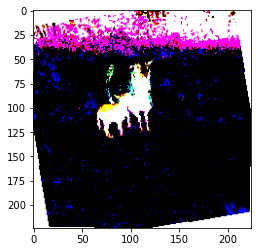

tensor([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19, 20])


In [38]:
# specify alpha value for blending (between 0 and 1)
alpha = 0

img1 = np.rot90(np.rot90(np.rot90((mask_rgb.reshape(3,224,224)).T)))
img2 = np.rot90(np.rot90(np.rot90((im.reshape(3,224,224)).T)))

# blend the images
blended_img = np.uint8(alpha * img1 + (1 - alpha) * img2)

plt.imshow(blended_img)
plt.show()
print(torch.unique(pred))

In [17]:
im1 = im[0].permute(1,2,0).numpy()

In [18]:
im2 = torch.from_numpy(mask_rgb).permute(1,2,0).numpy()

In [19]:
from skimage import color
result_image = color.label2rgb(im1,im1)

/tmp/ipykernel_10496/3124114470.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  result_image = color.label2rgb(im1,im1)


ValueError: `image` and `label` must be the same shape

In [79]:
np.unique(mask_rgb.reshape(3,224,224).T)

array([  0, 128, 192], dtype=uint8)

In [85]:
!pip install nvidia-ml-py3
import nvidia_smi

nvidia_smi.nvmlInit()

deviceCount = nvidia_smi.nvmlDeviceGetCount()
for i in range(deviceCount):
    handle = nvidia_smi.nvmlDeviceGetHandleByIndex(i)
    info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
    print("Device {}: {}, Memory : ({:.2f}% free): {}(total), {} (free), {} (used)".format(i, nvidia_smi.nvmlDeviceGetName(handle), 100*info.free/info.total, info.total, info.free, info.used))

nvidia_smi.nvmlShutdown()

Defaulting to user installation because normal site-packages is not writeable
Device 0: b'GeForce GTX 1080 Ti', Memory : (100.00% free): 11721506816(total), 11721506816 (free), 0 (used)


In [45]:
!python train_5_a.py

Metric before Training
Starting val on device for epoch 0 on device cuda
/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:693: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch._C._nn.max_pool2d_with_indices(input, kernel_size, stride, padding, dilation, ceil_mode)
Loss at epoch: 0 is 4.113063909389354
IoU at epoch: 0 is 0.001954148655491619
Pixel acc at epoch: 0 is 0.006819679911895314
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.001, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': True, 'Optimizer': '

In [20]:
!python train_5_c.py

Metric before Training
Starting val on device for epoch 0 on device cuda
/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Loss at epoch: 0 is 2.964288587923403
IoU at epoch: 0 is 0.00242422791703119
Pixel acc at epoch: 0 is 0.013439803004535148
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': True, 'Optimizer': 'AdamW', 'momentum if

epoch9, iter60, loss: 1.7823432683944702
epoch9, iter70, loss: 2.2855072021484375
Finish epoch 9, time elapsed 16.661606311798096

Starting val on device for epoch 10 on device cuda
Loss at epoch: 10 is 2.166110453782258
IoU at epoch: 10 is 0.0723065255934068
Pixel acc at epoch: 10 is 0.6343710693912982
This loss higher than before, increasing patience to 1
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch10, iter0, loss: 1.8173496723175049
epoch10, iter10, loss: 2.031097650527954
epoch10, iter20, loss: 1.7092838287353516
epoch10, iter30, loss: 1.5719000101089478
epoch10, iter40, loss: 1.7771224975585938
epoch10, iter50, loss: 1.9796416759490967
epoch10, iter60, loss: 1.645877480506897
epoch10, iter70, loss: 1.5995463132858276
Finish epoch 10, time elapsed 16.587319135665894

Starting val on device for epoch 11 on device cuda
Loss 

epoch20, iter0, loss: 1.8290727138519287
epoch20, iter10, loss: 1.9489097595214844
epoch20, iter20, loss: 1.568721890449524
epoch20, iter30, loss: 1.4976215362548828
epoch20, iter40, loss: 1.6630030870437622
epoch20, iter50, loss: 1.8743913173675537
epoch20, iter60, loss: 1.553399682044983
epoch20, iter70, loss: 1.4232813119888306
Finish epoch 20, time elapsed 16.607044458389282

Starting val on device for epoch 21 on device cuda
Loss at epoch: 21 is 1.9823107763572976
IoU at epoch: 21 is 0.07027383989311653
Pixel acc at epoch: 21 is 0.6829766444338152
________________________________________________________________________________________________________________________________________________________________________________________________________
epoch21, iter0, loss: 1.7764666080474854
epoch21, iter10, loss: 1.4561115503311157
epoch21, iter20, loss: 1.8841378688812256
epoch21, iter30, loss: 1.7164790630340576
epoch21, iter40, loss: 1.3602652549743652
epoch21, iter50, loss: 2.041388

In [1]:
!python train_5_c.py

Metric before Training
Starting val on device for epoch 0 on device cuda
/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Loss at epoch: 0 is 5.6184967182300705
IoU at epoch: 0 is 0.0007717318298101717
Pixel acc at epoch: 0 is 0.008150292452050263
________________________________________________________________________________________________________________________________________________________________________________________________________
Starting Training with the following params:
 {'learning rate': 0.01, 'lr_min': 0.0005, 'epochs': 30, 'criterion': 'Softmax + Cross Entropy', 'weighted loss': True, 'Optimizer': 'AdamW', 'momentum